

# Project: Investigate a Dataset - [No Show Appointment ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This dataset collects information from 100k medical appointments and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>‘ScheduledDay’ tells us on what day the patient set up their appointment.
> ‘Neighborhood’ indicates the location of the hospital.
>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
>‘No-show’ says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis

#### The questions I am trying to answer are:
1. What is the percentage of patients who show up on their appointements vs. who didn't
2. Is there any Gender difference in having a patient to be with status Show / No-Show?
3. Did scholarships affect the appointment turnout? 
4. Is there any Neighbourhood difference in having a patient to be with status Show / No-Show



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!pip install --upgrade pandas==1.1.5

    100% |████████████████████████████████| 9.5MB 1.8MB/s eta 0:00:01    17% |█████▌                          | 1.6MB 12.2MB/s eta 0:00:01    35% |███████████▌                    | 3.4MB 11.1MB/s eta 0:00:01    41% |█████████████▍                  | 4.0MB 12.1MB/s eta 0:00:01    47% |███████████████▎                | 4.5MB 12.7MB/s eta 0:00:01    72% |███████████████████████▏        | 6.9MB 24.1MB/s eta 0:00:01    84% |███████████████████████████     | 8.0MB 13.3MB/s eta 0:00:01    90% |████████████████████████████▉   | 8.6MB 11.0MB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 4.4MB/s ta 0:00:01    90% |█████████████████████████████   | 225kB 7.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.3MB/s ta 0:00:011  4% |█▌                              | 645kB 11.7MB/s eta 0:00:02    8% |██▊                             | 1.1MB 8.9MB/s eta 0:00:02    25% |████████                        | 3.3MB 9.8MB/s eta 0:00:02    29% |█████████▎                    

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.1MB/s eta 0:00:01   12% |████                            | 1.3MB 26.0MB/s eta 0:00:01    25% |████████                        | 2.6MB 30.2MB/s eta 0:00:01    37% |████████████                    | 3.9MB 25.9MB/s eta 0:00:01    50% |████████████████▏               | 5.3MB 28.6MB/s eta 0:00:01    63% |████████████████████▎           | 6.6MB 23.1MB/s eta 0:00:01    87% |████████████████████████████    | 9.1MB 26.9MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01   28% |█████████▎                      | 3.9MB 29.5MB/s eta 0:00:01    38% |████████████▍                   | 5.2MB 28.4MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully unins

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
#df.head()
#import the dataset 
#df = pd.read_csv('C:\\Users\\icya\\scripting\\investigate-a-dataset-template\\noshowappointments-kagglev2-may-2016.csv')

#display the first fie rows of data







In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.describe(include='all')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.shape

(110527, 14)

#### There are 110527 rows and 14 columns

In [7]:
#find the duplicates in this data
sum(df.duplicated())


0

##### There are no duplicates in the data

In [8]:
# find the statistics summaryof the data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
 #show colmn with - age ( -1) 
    
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
df = df.drop([99832]) #Clear row with  negative values

In [11]:
df['Age'].min() #done successfully. Now lets find the minimum age in the dataframe

0

#### The new minimum age is 0

In [12]:
#function to print values in the df dataset. This funtion prints the value in colums 99830-99840
def print_colums(df):
    for column in df.values[99830:99840]:
        print(column)

In [13]:
print_colums(df)

[721632677241752.0 5774220 'M' '2016-06-06T07:59:53Z'
 '2016-06-06T00:00:00Z' 1 'ROMÃO' 0 0 0 0 0 0 'No']
[98251782773783.0 5774337 'M' '2016-06-06T08:08:00Z' '2016-06-06T00:00:00Z'
 7 'CRUZAMENTO' 0 0 0 0 0 0 'No']
[28982712699339.0 5774075 'M' '2016-06-06T07:50:27Z' '2016-06-06T00:00:00Z'
 1 'FORTE SÃO JOÃO' 0 0 0 0 0 0 'No']
[927641864538845.0 5773979 'F' '2016-06-06T07:42:52Z'
 '2016-06-06T00:00:00Z' 0 'ROMÃO' 0 0 0 0 0 0 'No']
[345637171171179.0 5773464 'F' '2016-06-06T07:15:03Z'
 '2016-06-06T00:00:00Z' 1 'GURIGICA' 0 0 0 0 0 0 'No']
[26646894483.0 5768132 'M' '2016-06-03T07:21:08Z' '2016-06-06T00:00:00Z' 3
 'ROMÃO' 0 0 0 0 0 1 'No']
[32881341699862.0 5613881 'M' '2016-04-25T09:48:57Z' '2016-06-06T00:00:00Z'
 0 'ITARARÉ' 0 0 0 0 0 1 'Yes']
[29639934157797.0 5768135 'F' '2016-06-03T07:21:10Z' '2016-06-06T00:00:00Z'
 4 'FORTE SÃO JOÃO' 0 0 0 0 0 1 'No']
[36394568835996.0 5768145 'F' '2016-06-03T07:21:57Z' '2016-06-06T00:00:00Z'
 4 'ROMÃO' 0 0 0 0 0 1 'No']
[678326443165677.0 5771193

In [14]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
#rename the inaccuratefields
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'},inplace=True)

In [16]:
df.info()
#check if the fields hae been renamed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

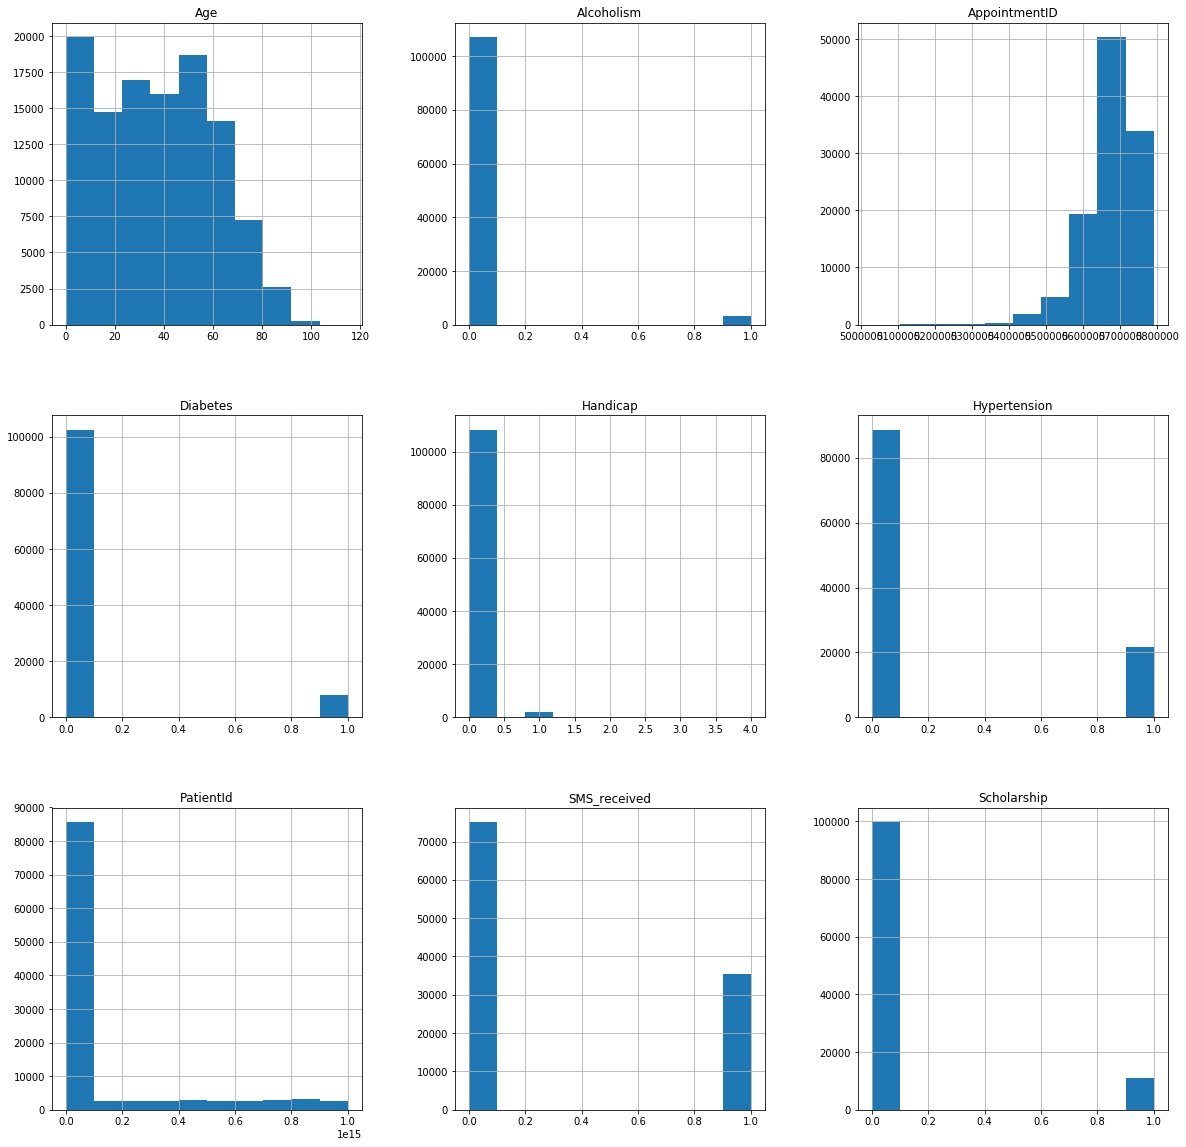

In [17]:
df.hist(figsize= (20,20));

#### From the histograms: 
#### The age graph is right-skewed hence , there are many young patients than the old
#### Few  people had hypertension, alcoholism, Handicap and Diabetes than those who did  
#### Half of the people receied sms  

In [18]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#cleaning rmoing null Values 
#We will invert the values in terms of
#- 0 means that the patient did not show up 
#-1 means that the patient Showed up
df["No-show"].replace({"Yes":0,"No":1},inplace=True)

In [19]:
df.info() #To make sure the No-show column type has changed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 12.6+ MB


In [20]:
#Change ScheduledDay and AppointmentDay into datetime Dtype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(2)
memory usage: 12.6+ MB


In [21]:
#Change PatientId and AppointmentId into datetime Dtype
df['PatientId'] = df['PatientId'].astype(str) #Changed successfully
df['AppointmentID'] = df['AppointmentID'].astype('str') #Changed successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null object
AppointmentID     110526 non-null object
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null int64
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 12.6+ MB


In [22]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### Research Question 1  (What is the percentage of patients who show up on their appointements vs. who don't?)

In [23]:
#   investigate.#1= patients who came 
# 0 patients who didnt show
showed = df[df["No-show"]==1].count()["No-show"] #The number of patients who came 


In [24]:
no_show = df[df['No-show'] == 0].count()['No-show'] #The number of patients who did not arrive 

In [25]:
print(showed , no_show)

88207 22319


#### A total of 88207 patients showed up for their appoinments while 22319 did not show up for appointment 

Text(0.5,1,'Patients who came  did not come')

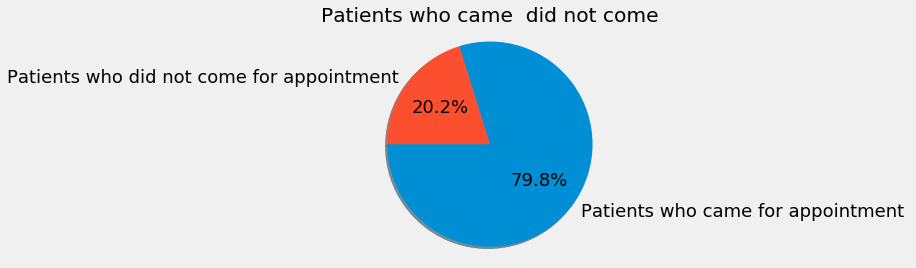

In [26]:
data = [showed,no_show]
label1 = ['Patients who came for appointment ','Patients who did not come for appointment']

plt.style.use('fivethirtyeight')
plt.axis('equal') #It helps to equalize the circular dimensions
plt.pie(data,labels=label1,radius=1.1,shadow=True,autopct='%1.1f%%',startangle=180,textprops = {"fontsize":18})
plt.title('Patients who came  did not come')

#### Around 79.8 % of people show up the appointment and around 20.2% did not.

## Research Question 2 (Which Gender honnoured their appointment more often !)

In [27]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
x = df.groupby(['Gender','No-show']).count()
x.head()

PatientId  AppointmentID  ScheduledDay  AppointmentDay    Age  \
Gender No-show                                                                  
F      0            14594          14594         14594           14594  14594   
       1            57245          57245         57245           57245  57245   
M      0             7725           7725          7725            7725   7725   
       1            30962          30962         30962           30962  30962   

                Neighbourhood  Scholarship  Hypertension  Diabetes  \
Gender No-show                                                       
F      0                14594        14594         14594     14594   
       1                57245        57245         57245     57245   
M      0                 7725         7725          7725      7725   
       1                30962        30962         30962     30962   

                Alcoholism  Handicap  SMS_received  
Gender No-show                                      
F      0             14594     14594         14594  
       1             57245     57245         57245  
M      0              7725      7725          7725  
       1             30962     30962         30962

Text(0,0.5,'count of patients')

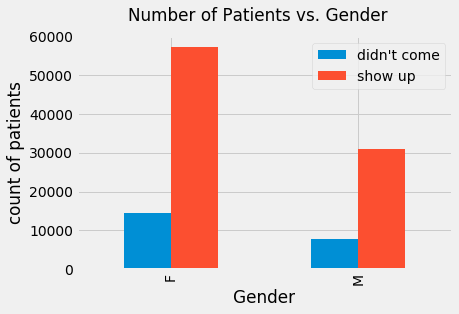

In [28]:
#plot a bar graph showing relationship between gender and no Show
x["PatientId"].unstack().plot(kind='bar',stacked=False,grid=True)
plt.legend(["didn't come",'show up']) 
plt.suptitle('Number of Patients vs. Gender') 
plt.ylabel('count of patients') #Add an address to the y axis

#### From the bar graph, there were more female patients(60,000) than male(30000). 
#### More female patients showed up than those who didnt show.
#### The number of females that dont show up is much more than the males that dont show up

### Question 3 (Did scholarships affect the appointment turnout?)

In [29]:
scholar = df.groupby(['Scholarship','No-show']).count()
x.head()

PatientId  AppointmentID  ScheduledDay  AppointmentDay    Age  \
Gender No-show                                                                  
F      0            14594          14594         14594           14594  14594   
       1            57245          57245         57245           57245  57245   
M      0             7725           7725          7725            7725   7725   
       1            30962          30962         30962           30962  30962   

                Neighbourhood  Scholarship  Hypertension  Diabetes  \
Gender No-show                                                       
F      0                14594        14594         14594     14594   
       1                57245        57245         57245     57245   
M      0                 7725         7725          7725      7725   
       1                30962        30962         30962     30962   

                Alcoholism  Handicap  SMS_received  
Gender No-show                                      
F      0             14594     14594         14594  
       1             57245     57245         57245  
M      0              7725      7725          7725  
       1             30962     30962         30962

Text(0.5,0,"('No_scholarship', 'With_Scholarship')")

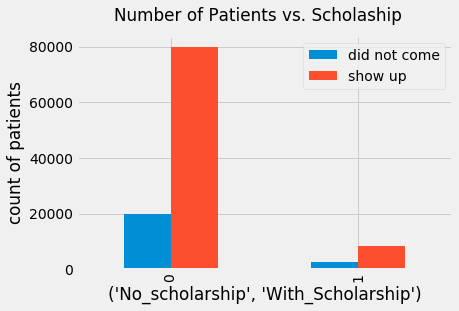

In [30]:
scholar["PatientId"].unstack().plot(kind='bar',stacked=False,)
labels = ('No_scholarship','With_Scholarship')
plt.legend(['did not come','show up'])
plt.suptitle('Number of Patients vs. Scholaship') 
plt.ylabel('count of patients') #Add an address to the y axis
plt.xlabel(labels)

#### From the graph  patients who did not have scholarships were many incomparison tho those who didnt have. 
#### Concurrenly those that didnt have scholarships didn't show up. 

## Question 4 (Distribution of people who showed up, who didn't show up for appointments per neghbourhood)

In [31]:
# County By no-show and group data bby neighbourhood
neigh = df.groupby(['Neighbourhood','No-show']).count()
neigh.head()

PatientId  AppointmentID  Gender  ScheduledDay  \
Neighbourhood   No-show                                                   
AEROPORTO       0                1              1       1             1   
                1                7              7       7             7   
ANDORINHAS      0              521            521     521           521   
                1             1741           1741    1741          1741   
ANTÔNIO HONÓRIO 0               50             50      50            50   

                         AppointmentDay   Age  Scholarship  Hypertension  \
Neighbourhood   No-show                                                    
AEROPORTO       0                     1     1            1             1   
                1                     7     7            7             7   
ANDORINHAS      0                   521   521          521           521   
                1                  1741  1741         1741          1741   
ANTÔNIO HONÓRIO 0                    50    50           50            50   

                         Diabetes  Alcoholism  Handicap  SMS_received  
Neighbourhood   No-show                                                
AEROPORTO       0               1           1         1             1  
                1               7           7         7             7  
ANDORINHAS      0             521         521       521           521  
                1            1741        1741      1741          1741  
ANTÔNIO HONÓRIO 0              50          50        50            50

Text(0,0.5,'count of patients')

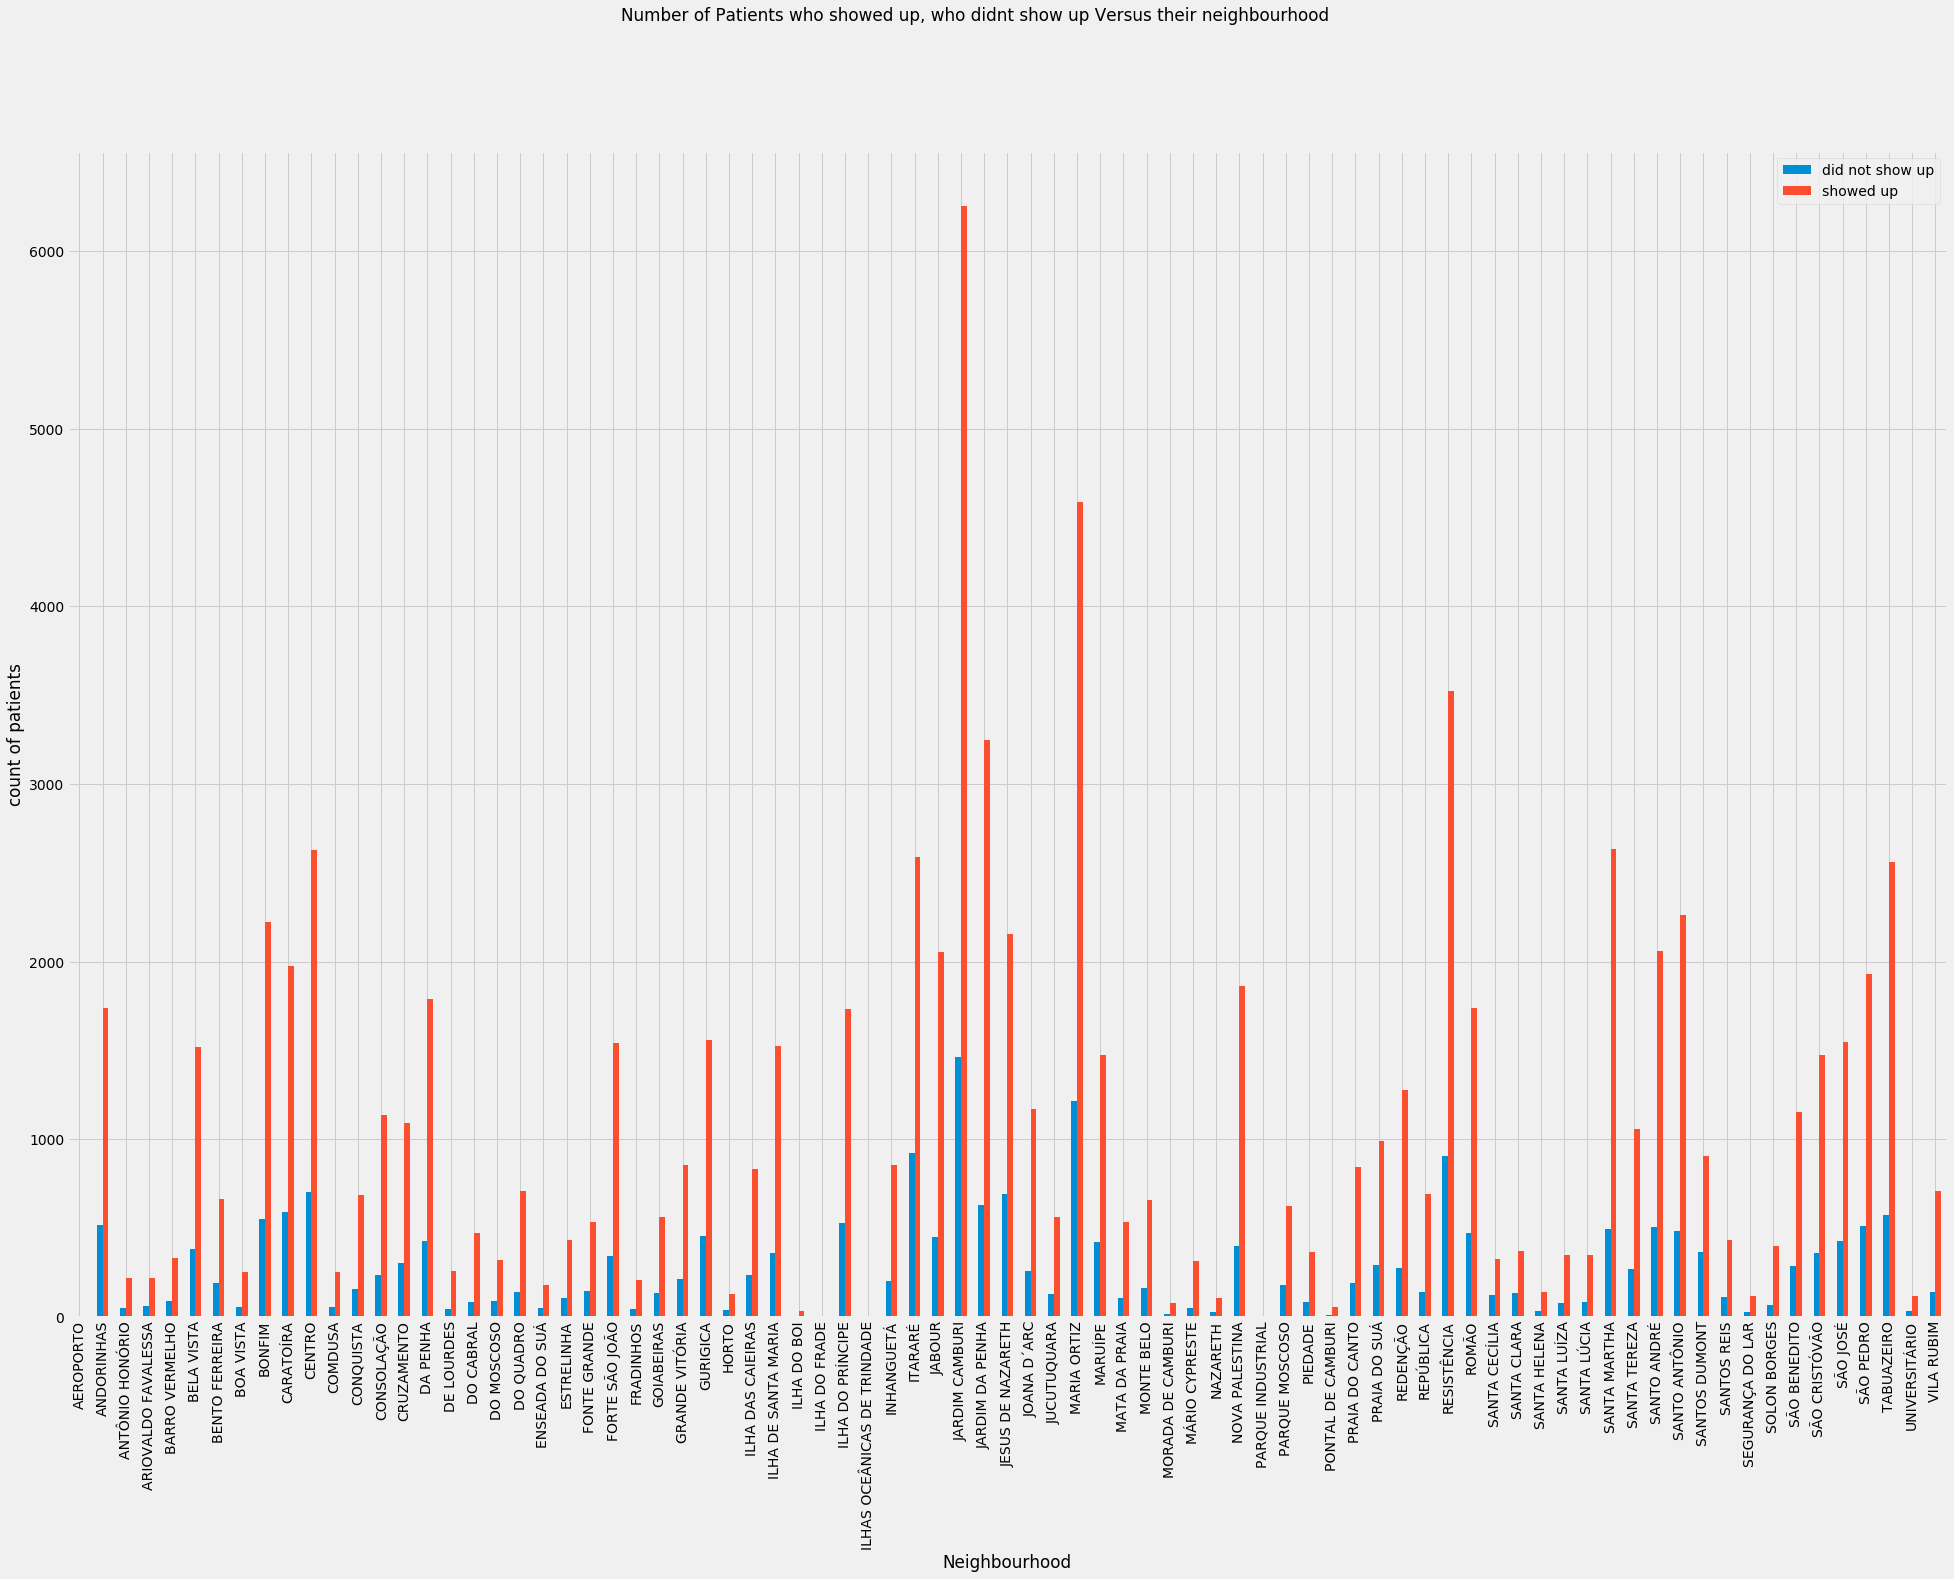

In [32]:
#
neigh["PatientId"].unstack().plot(kind='bar',stacked=False,figsize= (30,20))

plt.legend(['did not show up','showed up'])
plt.suptitle('Number of Patients who showed up, who didnt show up Versus their neighbourhood') 
plt.ylabel('count of patients') #Add an address to the y axis

#### JARDIM CAMBURI Neighborhood has majority of the showed up patient, followed by MARIA ORTIZ

In [33]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
110522,2.57213436929e+12,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,3.59626632874e+12,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,1.55766317299e+13,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,9.21349314356e+13,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,1
110526,3.77511518121e+14,5629448,F,2016-04-27 13:30:56,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,1


<a id='conclusions'></a>
## Conclusions

 *Conclusion: After analysing the data we have with respect to (Gender, Age, Neighbourhood ) I found the results below:

> 1-Majority of the patients turned out for their appointment,there are 20% of the patients didn't attend their appoinments by searching the data.
> 2. GenderSeems to hae a significant effect on the patient turnout. The number of females that dont show up is much more than the males that dont show up

> 3-Scholarships didnt improVe the turnout. Patients not enrolled to the  Scholarship are showing their appointments more than those who dont have scholarships.But Generally more people did not show up for their appointment in both instances.

> 4.There are neighborhoods with majority of patients turnout, JARDIM CAMBURI	 had the highest population of No-show Patients followed by MARIA ORTIZ. AEROPORTO	 had the least number No-show of appointments 

#### Limitation

> There we some illogical data such as patients with age 0 or less






In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

In [3]:
%%sh
ls -lh
pwd

total 13M
drwxr-xr-x 2 root root 4.0K Aug 11  2021 Database_Ncis_and_Census_data
drwxr-xr-x 2 root root 4.0K Aug 11  2021 Database_No_show_appointments
drwxr-xr-x 2 root root 4.0K Aug 11  2021 Database_Soccer
drwxr-xr-x 2 root root 4.0K Aug 11  2021 Database_TMDb_movie_data
-rw-r--r-- 1 root root 738K May 31 09:57 first
-rw-r--r-- 1 root root 728K Jun  6 11:50 Investigate_a_Dataset.html
-rw-r--r-- 1 root root 466K Jun  6 16:05 Investigate_a_Dataset.ipynb
-rw-r--r-- 1 root root  11M May 31 09:43 noshowappointments-kagglev2-may-2016.csv
/home/workspace
